In [31]:
from DS_Planck_Unet import *
import numpy as np
from tensorflow.keras.callbacks import ModelCheckpoint
import pickle
from tensorflow import convert_to_tensor

In [2]:
model = unet_planck()

In [3]:
batch_size = 20
min_rad = 2

In [4]:
val_gen = gen_data('/home/rt2122/Data/clusters/planck_z.csv', val_pix, batch_size, 
                   search_nside=256, min_rad=min_rad, centers_in_patch=True)
train_gen = gen_data('/home/rt2122/Data/clusters/planck_z.csv', train_pix, batch_size, 
                    search_nside=256, min_rad=min_rad, centers_in_patch=True)
test_gen = gen_data('/home/rt2122/Data/clusters/planck_z.csv', test_pix, 1, 
                   search_nside=256, min_rad=min_rad, centers_in_patch=True)

(1, 64, 64, 6) (1, 64, 64, 1)


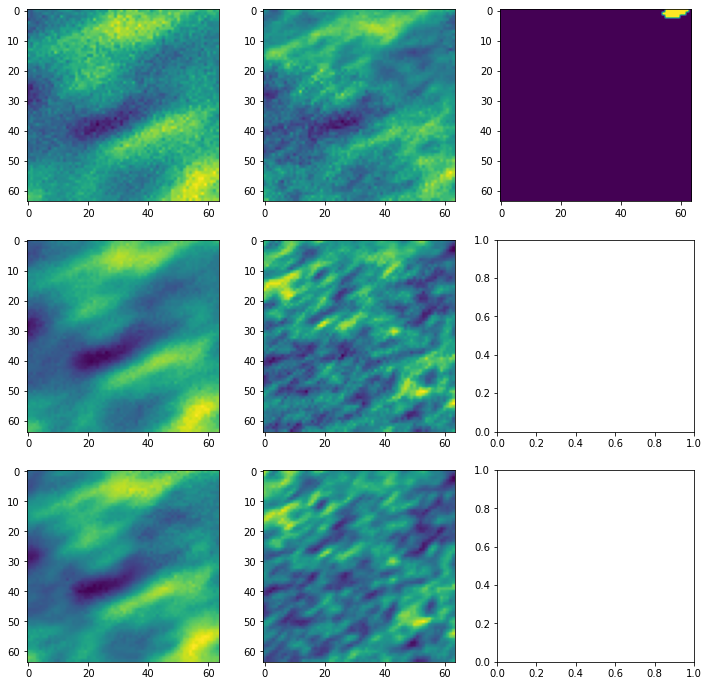

In [5]:
check_gen(test_gen)

In [6]:
filepath='/home/rt2122/Models/planck_z/f8d2.ep{epoch:04d}-vl{val_loss:.6f}-l{loss:.6f}.h5'
checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, mode='min', save_weights_only=True)
callbacks_list = [checkpoint]

In [7]:
history = model.fit_generator(generator=train_gen, steps_per_epoch=50, epochs=10, 
                    validation_data=val_gen, validation_steps=1, 
                    callbacks=callbacks_list, initial_epoch=0)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/10
50/50 [==============================] - ETA: 0s - loss: 0.5484 - accuracy: 0.8863 - iou: 0.0090 - dice: 0.0180 
Epoch 00001: val_loss improved from inf to 0.20109, saving model to /home/rt2122/Models/planck_z/f8d2.ep0001-vl0.201093-l0.548424.h5
50/50 [==============================] - 1761s 35s/step - loss: 0.5484 - accuracy: 0.8863 - iou: 0.0090 - dice: 0.0180 - val_loss: 0.2011 - val_accuracy: 0.9898 - val_iou: 0.0087 - val_dice: 0.0174
Epoch 2/10
50/50 [==============================] - ETA: 0s - loss: 0.1579 - accuracy: 0.9779 - iou: 0.0080 - dice: 0.0160 
Epoch 00002: val_loss improved from 0.20109 to 0.16981, saving model to /home/rt2122/Models/planck_z/f8d2.ep0002-vl0.169813-l0.157921.h5
50/50 [==============================] - 1833s 37s/step - loss: 0.1579 - accuracy: 0.9779 - iou: 0.0080 - dice: 0.0160 - val_loss: 0.1698 - val_accuracy: 0.9884 - val_iou: 0.0106 - val_dice: 0.0212
Epoch 3/10

(1, 64, 64, 6) (1, 64, 64, 1)


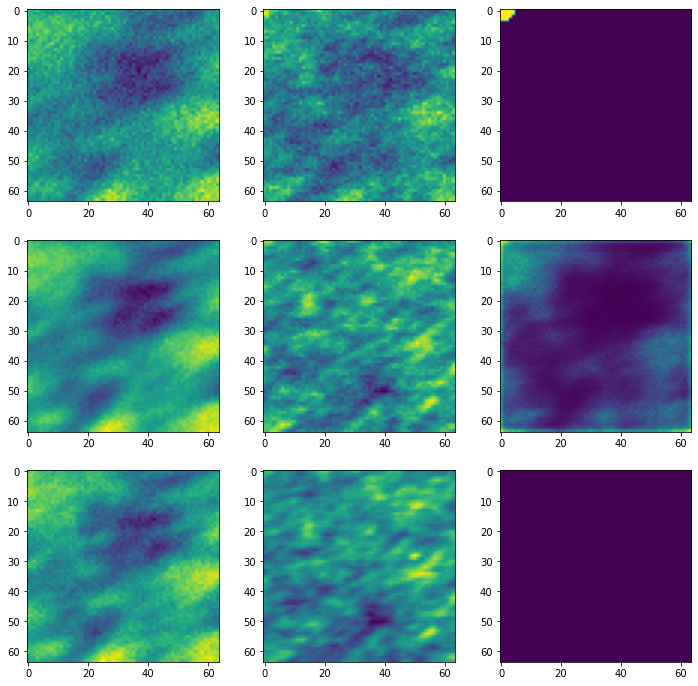

In [8]:
check_gen(test_gen, model)

In [9]:
with open('/home/rt2122/Models/f8d2.ep1-10.history', 'wb') as f:
    pickle.dump(history.history, f)

In [10]:
history = model.fit_generator(generator=train_gen, steps_per_epoch=50, epochs=20, 
                    validation_data=val_gen, validation_steps=1, 
                    callbacks=callbacks_list, initial_epoch=10)

Epoch 11/20
50/50 [==============================] - ETA: 0s - loss: 0.0853 - accuracy: 0.9885 - iou: 0.0074 - dice: 0.0149 
Epoch 00011: val_loss did not improve from 0.15185
50/50 [==============================] - 2201s 44s/step - loss: 0.0853 - accuracy: 0.9885 - iou: 0.0074 - dice: 0.0149 - val_loss: 0.1591 - val_accuracy: 0.9897 - val_iou: 0.0108 - val_dice: 0.0215
Epoch 12/20
50/50 [==============================] - ETA: 0s - loss: 0.0831 - accuracy: 0.9886 - iou: 0.0075 - dice: 0.0150 
Epoch 00012: val_loss did not improve from 0.15185
50/50 [==============================] - 2174s 43s/step - loss: 0.0831 - accuracy: 0.9886 - iou: 0.0075 - dice: 0.0150 - val_loss: 0.1567 - val_accuracy: 0.9892 - val_iou: 0.0107 - val_dice: 0.0215
Epoch 13/20
50/50 [==============================] - ETA: 0s - loss: 0.0805 - accuracy: 0.9889 - iou: 0.0074 - dice: 0.0148 
Epoch 00013: val_loss improved from 0.15185 to 0.15061, saving model to /home/rt2122/Models/planck_z/f8d2.ep0013-vl0.150611-l0.

(1, 64, 64, 6) (1, 64, 64, 1)


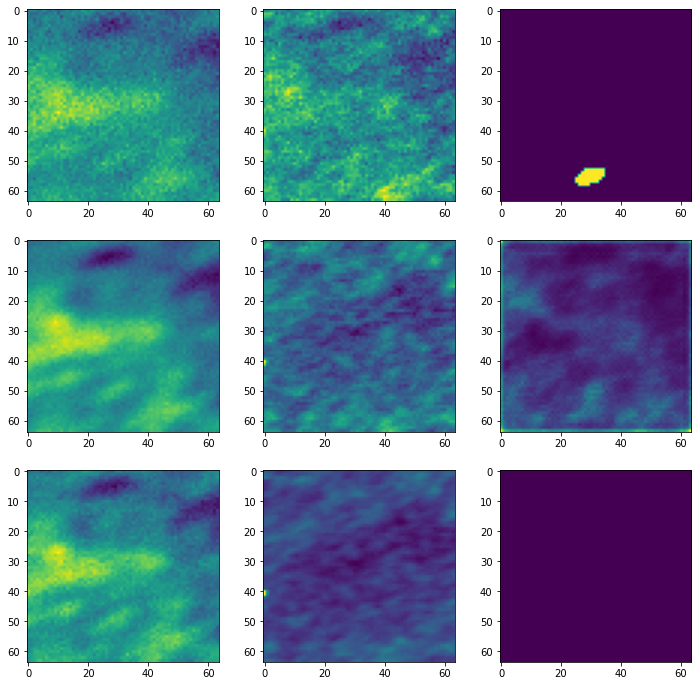

In [11]:
check_gen(test_gen, model)

In [12]:
with open('/home/rt2122/Models/f8d2.ep11-20.history', 'wb') as f:
    pickle.dump(history.history, f)

In [13]:
history = model.fit_generator(generator=train_gen, steps_per_epoch=50, epochs=30, 
                    validation_data=val_gen, validation_steps=1, 
                    callbacks=callbacks_list, initial_epoch=20)

Epoch 21/30
50/50 [==============================] - ETA: 0s - loss: 0.0662 - accuracy: 0.9895 - iou: 0.0109 - dice: 0.0218 
Epoch 00021: val_loss improved from 0.10320 to 0.09097, saving model to /home/rt2122/Models/planck_z/f8d2.ep0021-vl0.090966-l0.066157.h5
50/50 [==============================] - 2641s 53s/step - loss: 0.0662 - accuracy: 0.9895 - iou: 0.0109 - dice: 0.0218 - val_loss: 0.0910 - val_accuracy: 0.9896 - val_iou: 0.0156 - val_dice: 0.0312
Epoch 22/30
50/50 [==============================] - ETA: 0s - loss: 0.0633 - accuracy: 0.9895 - iou: 0.0130 - dice: 0.0260 
Epoch 00022: val_loss improved from 0.09097 to 0.08100, saving model to /home/rt2122/Models/planck_z/f8d2.ep0022-vl0.080999-l0.063321.h5
50/50 [==============================] - 2338s 47s/step - loss: 0.0633 - accuracy: 0.9895 - iou: 0.0130 - dice: 0.0260 - val_loss: 0.0810 - val_accuracy: 0.9889 - val_iou: 0.0228 - val_dice: 0.0457
Epoch 23/30
50/50 [==============================] - ETA: 0s - loss: 0.0620 - ac

(1, 64, 64, 6) (1, 64, 64, 1)


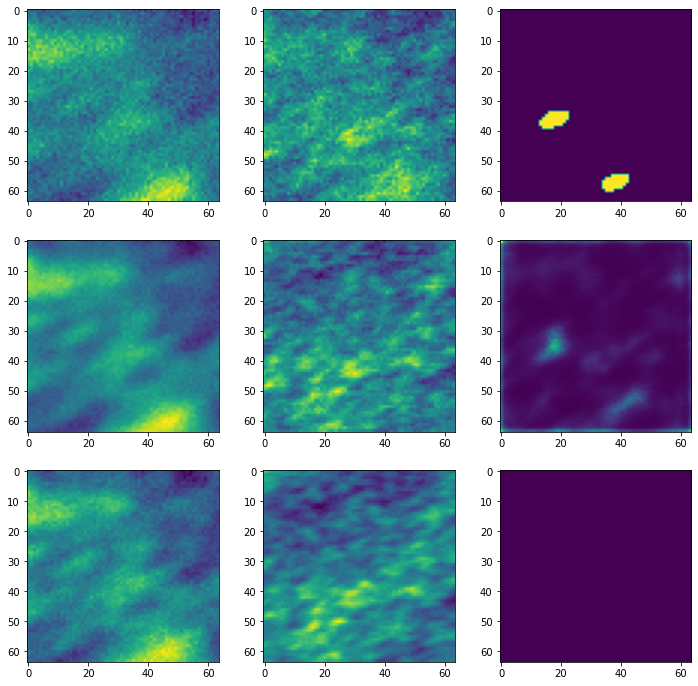

In [14]:
check_gen(test_gen, model)

In [15]:
with open('/home/rt2122/Models/f8d2.ep21-30.history', 'wb') as f:
    pickle.dump(history.history, f)

In [16]:
history = model.fit_generator(generator=train_gen, steps_per_epoch=50, epochs=40, 
                    validation_data=val_gen, validation_steps=1, 
                    callbacks=callbacks_list, initial_epoch=30)

Epoch 31/40
50/50 [==============================] - ETA: 0s - loss: 0.0532 - accuracy: 0.9896 - iou: 0.0264 - dice: 0.0528 
Epoch 00031: val_loss did not improve from 0.05078
50/50 [==============================] - 2086s 42s/step - loss: 0.0532 - accuracy: 0.9896 - iou: 0.0264 - dice: 0.0528 - val_loss: 0.0556 - val_accuracy: 0.9880 - val_iou: 0.0307 - val_dice: 0.0615
Epoch 32/40
50/50 [==============================] - ETA: 0s - loss: 0.0525 - accuracy: 0.9895 - iou: 0.0304 - dice: 0.0608 
Epoch 00032: val_loss did not improve from 0.05078
50/50 [==============================] - 2174s 43s/step - loss: 0.0525 - accuracy: 0.9895 - iou: 0.0304 - dice: 0.0608 - val_loss: 0.0543 - val_accuracy: 0.9881 - val_iou: 0.0364 - val_dice: 0.0729
Epoch 33/40
50/50 [==============================] - ETA: 0s - loss: 0.0515 - accuracy: 0.9898 - iou: 0.0296 - dice: 0.0593 
Epoch 00033: val_loss did not improve from 0.05078
50/50 [==============================] - 2108s 42s/step - loss: 0.0515 - acc

(1, 64, 64, 6) (1, 64, 64, 1)


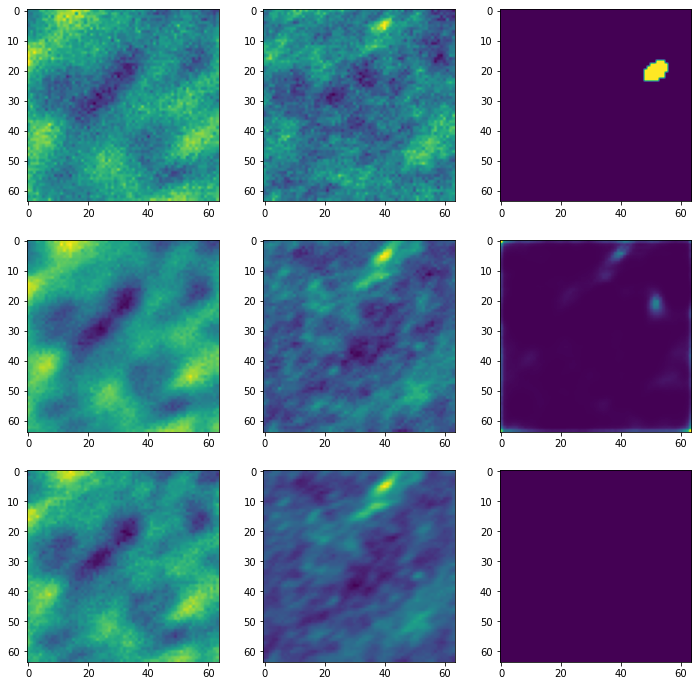

In [17]:
check_gen(test_gen, model)

In [18]:
with open('/home/rt2122/Models/f8d2.ep31-40.history', 'wb') as f:
    pickle.dump(history.history, f)

In [19]:
history = model.fit_generator(generator=train_gen, steps_per_epoch=50, epochs=50, 
                    validation_data=val_gen, validation_steps=1, 
                    callbacks=callbacks_list, initial_epoch=40)

Epoch 41/50
50/50 [==============================] - ETA: 0s - loss: 0.0477 - accuracy: 0.9896 - iou: 0.0458 - dice: 0.0916 
Epoch 00041: val_loss did not improve from 0.04345
50/50 [==============================] - 1875s 38s/step - loss: 0.0477 - accuracy: 0.9896 - iou: 0.0458 - dice: 0.0916 - val_loss: 0.0486 - val_accuracy: 0.9895 - val_iou: 0.0429 - val_dice: 0.0858
Epoch 42/50
50/50 [==============================] - ETA: 0s - loss: 0.0467 - accuracy: 0.9895 - iou: 0.0492 - dice: 0.0986 
Epoch 00042: val_loss did not improve from 0.04345
50/50 [==============================] - 1727s 35s/step - loss: 0.0467 - accuracy: 0.9895 - iou: 0.0492 - dice: 0.0986 - val_loss: 0.0518 - val_accuracy: 0.9895 - val_iou: 0.0412 - val_dice: 0.0825
Epoch 43/50
50/50 [==============================] - ETA: 0s - loss: 0.0464 - accuracy: 0.9897 - iou: 0.0472 - dice: 0.0945 
Epoch 00043: val_loss improved from 0.04345 to 0.04027, saving model to /home/rt2122/Models/planck_z/f8d2.ep0043-vl0.040271-l0.

(1, 64, 64, 6) (1, 64, 64, 1)


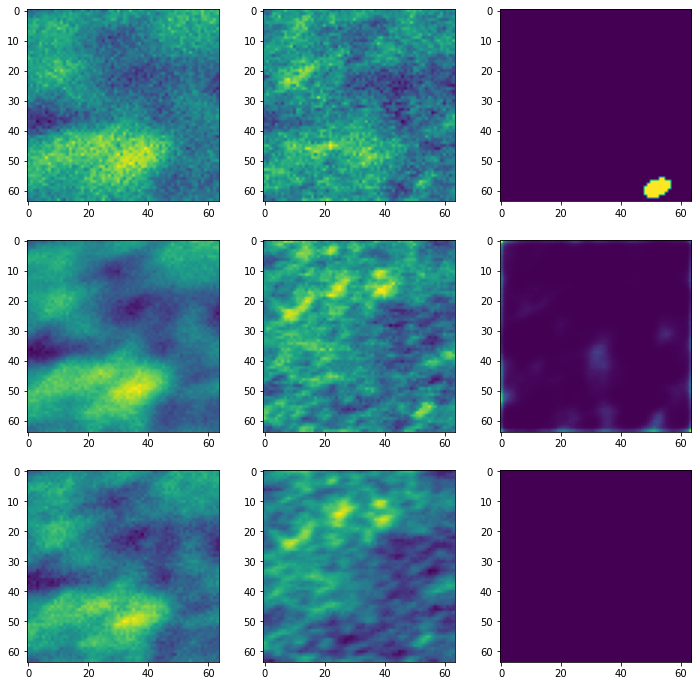

In [20]:
check_gen(test_gen, model)

In [21]:
with open('/home/rt2122/Models/f8d2.ep41-50.history', 'wb') as f:
    pickle.dump(history.history, f)

In [22]:
history = model.fit_generator(generator=train_gen, steps_per_epoch=50, epochs=60, 
                    validation_data=val_gen, validation_steps=1, 
                    callbacks=callbacks_list, initial_epoch=50)

Epoch 51/60
50/50 [==============================] - ETA: 0s - loss: 0.0423 - accuracy: 0.9897 - iou: 0.0632 - dice: 0.1265 
Epoch 00051: val_loss improved from 0.03963 to 0.03908, saving model to /home/rt2122/Models/planck_z/f8d2.ep0051-vl0.039081-l0.042343.h5
50/50 [==============================] - 2716s 54s/step - loss: 0.0423 - accuracy: 0.9897 - iou: 0.0632 - dice: 0.1265 - val_loss: 0.0391 - val_accuracy: 0.9894 - val_iou: 0.0777 - val_dice: 0.1554
Epoch 52/60
50/50 [==============================] - ETA: 0s - loss: 0.0427 - accuracy: 0.9896 - iou: 0.0641 - dice: 0.1282 
Epoch 00052: val_loss did not improve from 0.03908
50/50 [==============================] - 2435s 49s/step - loss: 0.0427 - accuracy: 0.9896 - iou: 0.0641 - dice: 0.1282 - val_loss: 0.0451 - val_accuracy: 0.9903 - val_iou: 0.0649 - val_dice: 0.1298
Epoch 53/60
50/50 [==============================] - ETA: 0s - loss: 0.0424 - accuracy: 0.9896 - iou: 0.0665 - dice: 0.1331 
Epoch 00053: val_loss did not improve fro

(1, 64, 64, 6) (1, 64, 64, 1)


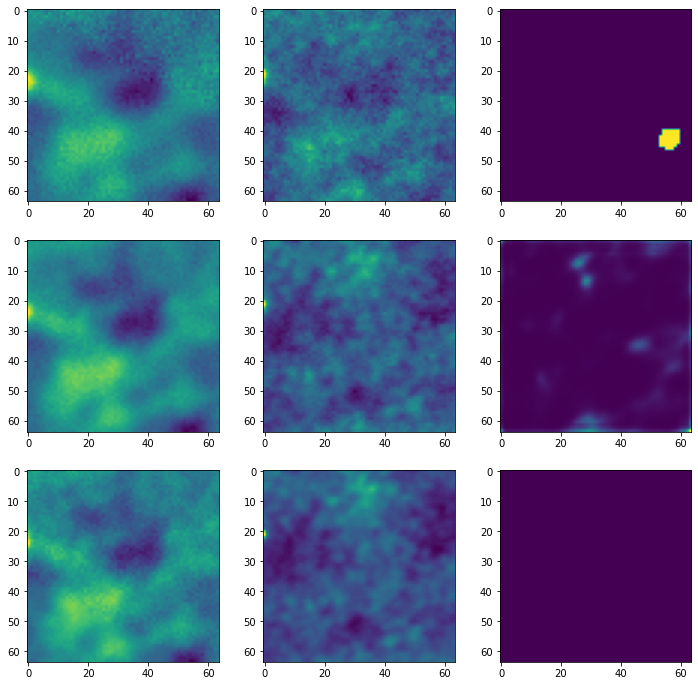

In [23]:
check_gen(test_gen, model)

In [24]:
with open('/home/rt2122/Models/f8d2.ep51-60.history', 'wb') as f:
    pickle.dump(history.history, f)

In [25]:
history = model.fit_generator(generator=train_gen, steps_per_epoch=50, epochs=70, 
                    validation_data=val_gen, validation_steps=1, 
                    callbacks=callbacks_list, initial_epoch=60)

Epoch 61/70
50/50 [==============================] - ETA: 0s - loss: 0.0402 - accuracy: 0.9896 - iou: 0.0764 - dice: 0.1528 
Epoch 00061: val_loss did not improve from 0.03744
50/50 [==============================] - 1829s 37s/step - loss: 0.0402 - accuracy: 0.9896 - iou: 0.0764 - dice: 0.1528 - val_loss: 0.0430 - val_accuracy: 0.9897 - val_iou: 0.0667 - val_dice: 0.1335
Epoch 62/70
50/50 [==============================] - ETA: 0s - loss: 0.0406 - accuracy: 0.9897 - iou: 0.0744 - dice: 0.1489 
Epoch 00062: val_loss did not improve from 0.03744
50/50 [==============================] - 1840s 37s/step - loss: 0.0406 - accuracy: 0.9897 - iou: 0.0744 - dice: 0.1489 - val_loss: 0.0402 - val_accuracy: 0.9884 - val_iou: 0.0881 - val_dice: 0.1762
Epoch 63/70
50/50 [==============================] - ETA: 0s - loss: 0.0399 - accuracy: 0.9899 - iou: 0.0775 - dice: 0.1551 
Epoch 00063: val_loss improved from 0.03744 to 0.03081, saving model to /home/rt2122/Models/planck_z/f8d2.ep0063-vl0.030814-l0.

(1, 64, 64, 6) (1, 64, 64, 1)


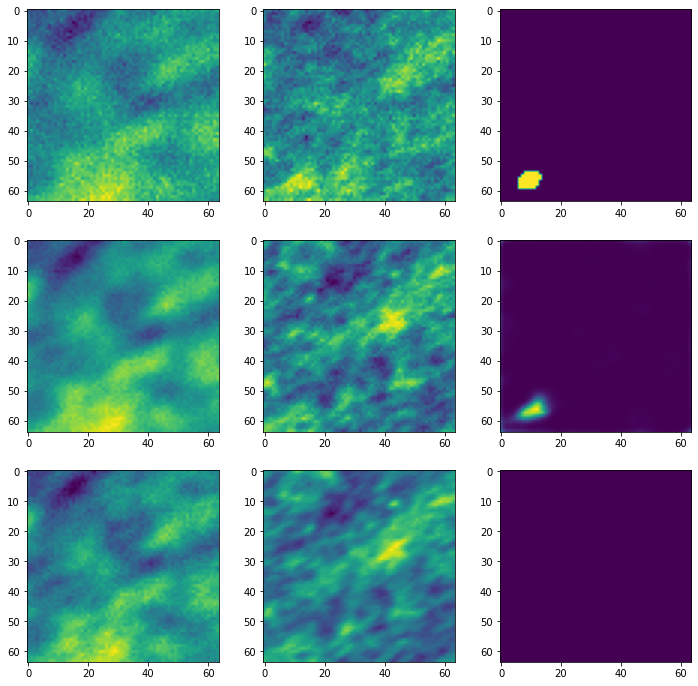

In [26]:
check_gen(test_gen, model)

In [27]:
with open('/home/rt2122/Models/f8d2.ep61-70.history', 'wb') as f:
    pickle.dump(history.history, f)

In [28]:
history = model.fit_generator(generator=train_gen, steps_per_epoch=50, epochs=80, 
                    validation_data=val_gen, validation_steps=1, 
                    callbacks=callbacks_list, initial_epoch=70)

Epoch 71/80
50/50 [==============================] - ETA: 0s - loss: 0.0369 - accuracy: 0.9901 - iou: 0.0933 - dice: 0.1867 
Epoch 00071: val_loss did not improve from 0.03081
50/50 [==============================] - 1801s 36s/step - loss: 0.0369 - accuracy: 0.9901 - iou: 0.0933 - dice: 0.1867 - val_loss: 0.0411 - val_accuracy: 0.9893 - val_iou: 0.0850 - val_dice: 0.1700
Epoch 72/80
50/50 [==============================] - ETA: 0s - loss: 0.0378 - accuracy: 0.9901 - iou: 0.0891 - dice: 0.1783 
Epoch 00072: val_loss did not improve from 0.03081
50/50 [==============================] - 1834s 37s/step - loss: 0.0378 - accuracy: 0.9901 - iou: 0.0891 - dice: 0.1783 - val_loss: 0.0399 - val_accuracy: 0.9898 - val_iou: 0.0703 - val_dice: 0.1406
Epoch 73/80
50/50 [==============================] - ETA: 0s - loss: 0.0372 - accuracy: 0.9901 - iou: 0.0941 - dice: 0.1883 
Epoch 00073: val_loss did not improve from 0.03081
50/50 [==============================] - 1864s 37s/step - loss: 0.0372 - acc

(1, 64, 64, 6) (1, 64, 64, 1)


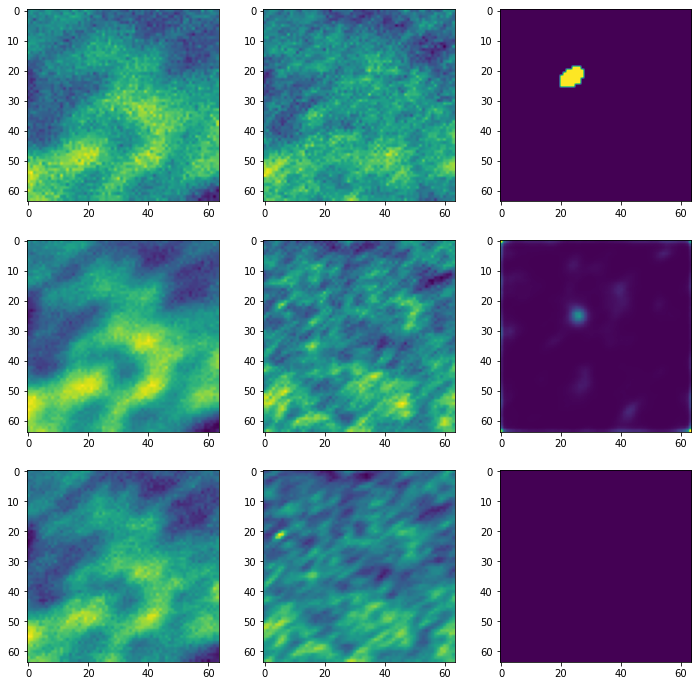

In [29]:
check_gen(test_gen, model)

In [30]:
with open('/home/rt2122/Models/f8d2.ep71-80.history', 'wb') as f:
    pickle.dump(history.history, f)

In [35]:
model.save_weights('/home/rt2122/Models/planck_z/f8d2.ep81.h5')

In [32]:
train_data = next(train_gen)
pic = convert_to_tensor(train_data[0])
mask = convert_to_tensor(train_data[1])

In [34]:
history = model.fit(pic, mask, steps_per_epoch=1, epochs=81, initial_epoch=80)

Epoch 81/81
1/1 [==============================] - 0s 3ms/step - loss: 0.0356 - accuracy: 0.9901 - iou: 0.0815 - dice: 0.1631
